In [1]:
from sympy import *
from sympy.plotting import (plot, plot_parametric)

IMPLICIT AND PARAMETRIC TANGENTS IN PYTHON

IMPLICIT
-------------------------------
Implicit curves can be plotted in Python using the **plot_implicit** command and differentiated using the **idiff** command.  

NOTE: The example here (and in future overviews) is NOT a copy/paste to solve the problems in lab.  However, it will USE many of the features you will use to solve your problems, such as (in this case) differentiating functions, finding slopes and equations of tangent lines, solving equations, and plotting.

EXAMPLE (3.6 #73): 

The equation x^2 - xy + y^2 = 3 represents a "rotated ellipse," that is, an ellipse whose axes are not parallel to the coordinate axes. 

a) Find the points at which the ellipse crosses the x-axis and show that the tangent lines at these points are parallel.

b) Find the points where the ellipse has horizontal and vertical tangent lines. Plot the curve with these tangent lines.

As always, start by writing down the steps you would use to solve the problems by hand first:
(Part a)
   1. "crosses the x-axis" means y=0 (**subs**)
   
   2. Solve for x (**solve**)
   
   3. Differentiate implicitly (**idiff**)
   
   3. Enter the x and y values to get the slopes (**subs**)

In [2]:
x,y=symbols('x y') # NOTE that both x AND y have to be defined now
eqn=x**2-x*y+y**2-3  # I personally prefer moving everything to one side of the equation so the expression = 0
# Step 1
xcross=eqn.subs(y,0)
# Step 2
xint=solve(xcross)
print(xint)  # Checking answers

[-sqrt(3), sqrt(3)]


In [3]:
# Step 3
dydx=idiff(eqn,y,x)  #General syntax: dTOP/dBOTTOM=idiff(expression,TOP,BOTTOM)
print('Implicit differentiation yields dy/dx=',dydx)
# Step 4
m1=dydx.subs({x:-sqrt(3),y:0}) #Using the dictionary type for multiple substitutions here
m2=dydx.subs([(x,sqrt(3)),(y,0)]) #Can also use a list of tuples as done here
print('The slopes at the x-intercepts are',m1,'and',m2,'which are equal.')

Implicit differentiation yields dy/dx= (2*x - y)/(x - 2*y)
The slopes at the x-intercepts are 2 and 2 which are equal.


Steps to solve part b by hand:

  1. Find dy/dx (**idiff**)
  
  2. Horizontal tangents: set the numerator = 0 (**solve**: note that if the numerator has both x and y in it, x and y must satisfy the original equation as well!)
  
  3.  Vertical tangents: set the denominator = 0 (**solve**: same note about the denominator)
  
  4.  Plot everything (**plot_implicit** for equation, **plot_parametric** for the horizontal and vertical lines: for horizontal, x=t, y=#; for vertical, x=#, y=t)


In [4]:
# Step 1: We already found dy/dx, we just need to see it first
print('dy/dx=',dydx)

dy/dx= (2*x - y)/(x - 2*y)


In [5]:
# Step 2
NUM=numer(dydx) # We can just retype the numerator, or use the numer command 
htan=solve([NUM,eqn],[x,y])
print('Horizontal tangents at',htan)
# Step 3
DEN=denom(dydx)  # We can just retype the denominator, or use the denominator command
vtan=solve([DEN,eqn],[x,y])
print('Vertical tangents at',vtan)

Horizontal tangents at [(-1, -2), (1, 2)]
Vertical tangents at [(-2, -1), (2, 1)]


In [6]:
matplotlib notebook

NOTE that since we are using two different plot commands, we have to use the **.extend** option to combine them; they cannot be plotted in one command

<IPython.core.display.Javascript object>


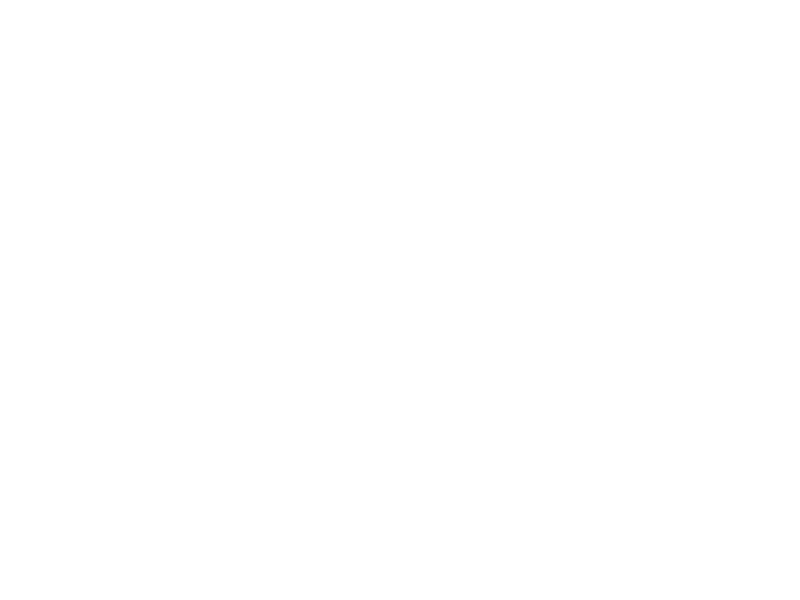

In [7]:
pcurve=plot_implicit(eqn,(x,-2.5,2.5),(y,-2.5,2.5),show=False)
# Using parametric equations to plot horizontal and vertical lines: x=#, y=t NEED TO SYMBOLICALLY DEFINE t FIRST!!!
t=symbols('t')
phoriz=plot_parametric((t,-2,(t,-2.5,2.5)),(t,2,(t,-2.5,2.5)),show=False)
# Both of these CAN be combined into one plot_parametric command if you want
pvert=plot_parametric((-2,t,(t,-2.5,2.5)),(2,t,(t,-2.5,2.5)),show=False)
pcurve.extend(phoriz)
pcurve.extend(pvert)
pcurve.show()

Parametric
------------------------
Recall that slopes of tangent lines can be found by the formula dy/dx = (dy/dt) / (dx/dt).

EXAMPLE:

Given the curve parametrized by x=sin(t), y=sin(2t):

a) Plot the curve on the domain [0, 2pi].

b) Find the equation of the line tangent to the curve at t=5pi/6

c) Find the points on the curve where the tangent line is horizontal and where the tangent line is vertical.

d) Find the equations of the tangent lines at the origin, and plot both on the same graph.

Part a just requires the **plot_parametric** function. 

In [8]:
matplotlib notebook

<IPython.core.display.Javascript object>


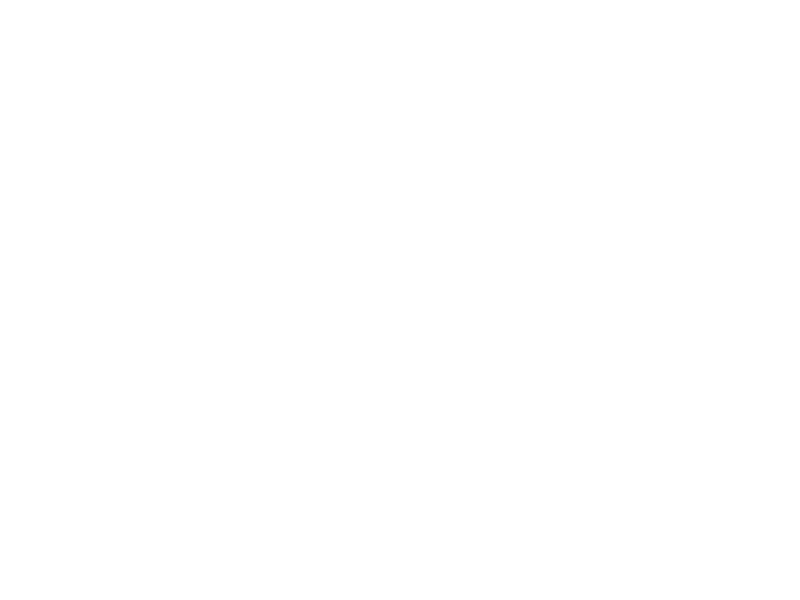

In [9]:
t=symbols('t',positive=True) 
xoft=sin(t) # using xoft and yoft since we will need x for the tangent line equation in part b)
yoft=sin(2*t)
plot_parametric(xoft,yoft,(t,0,2*pi))

Steps to solve part b by hand (recall we need a slope and a point):
   1. take the derivative using the formula stated at the beginning (**diff**) 
   
   2.  Substitute t=5pi/6 into the derivative for the slope (**subs**)
   
   3. Substitute t=5pi/6 into the original functions for the point (**subs**)
   
   4. Print the equation y = y0 + m(x-x0) (**print**)

In [10]:
#Step 1
xp=diff(xoft,t)
yp=diff(yoft,t)
dydx=yp/xp
print('dy/dx=',dydx)
#Step 2
m=dydx.subs(t,5*pi/6)
print('The slope of the tangent line is',m,'or approximately',m.evalf())
#Step 3
x0=xoft.subs(t,5*pi/6)
y0=yoft.subs(t,5*pi/6)
print('The point on the tangent line is (',x0,',',y0,')')
#Step 4
x=symbols('x')
tanline=y0+m*(x-x0)
print('The equation of the tangent line is',tanline)
print('or approximately',tanline.evalf())

dy/dx= 2*cos(2*t)/cos(t)
The slope of the tangent line is -2*sqrt(3)/3 or approximately -1.15470053837925
The point on the tangent line is ( 1/2 , -sqrt(3)/2 )
The equation of the tangent line is -2*sqrt(3)*(x - 1/2)/3 - sqrt(3)/2
or approximately -1.15470053837925*x - 0.288675134594813


Steps to solve part c by hand:
  1. Find dy/dt and dx/dt (**diff**, though already done in the previous step)
  
  2. For horizontal tangents, solve dy/dt=0 (**solve**) *-NOTE: the solve command does NOT find all solutions in (0,2pi).  A short google search revealed a command* **solveset** *which will find all solutions on a specified **Interval**-see syntax below.  Only needed for equations involving trig functions with period < 2pi*
  
  3. For vertical tangents, solve dx/dt=0 (**solve**)
  
  4. These only tell us WHEN the curve has horizontal and vertical tangents. To find WHERE, substitute the t-values into x and y (**subs**.  ALSO note that solve returns a list of solutions, so we can use list comprehension-**for**-to find each set of points at one time!)

In [11]:
# Step 1 done in part b, called xp and yp
# Step 2
t_horiz=solveset(yp,t,domain=Interval(0,2*pi))  # Period of y' is < 2pi.  Refer to the note above
print('Horizontal tangents when t=',t_horiz)
# Step 3
t_vert=solve(xp,t)  # period of x' is 2pi, so solve command finds all solutions
print('Vertical tangents when t=',t_vert)
# Step 4
horiz=[[xoft.subs(t,i),yoft.subs(t,i)] for i in t_horiz]
vert=[[xoft.subs(t,i),yoft.subs(t,i)] for i in t_vert]
print('Horizontal tangents at the points',horiz)
print('And vertical tangents at the points',vert)

Horizontal tangents when t= FiniteSet(pi/4, 3*pi/4, 5*pi/4, 7*pi/4)
Vertical tangents when t= [pi/2, 3*pi/2]
Horizontal tangents at the points [[sqrt(2)/2, 1], [sqrt(2)/2, -1], [-sqrt(2)/2, 1], [-sqrt(2)/2, -1]]
And vertical tangents at the points [[1, 0], [-1, 0]]


Steps to solve part d) by hand:

   1. Start the same as part b (**diff** already done)
   
   2. We don't have the t-values, just x=0 and y=0.  Solve each for t (**solve**)
   
   3. Once we have t, repeat steps 2 (**subs**) and 4 (**print**) from part b (NOTE that we already know x0=0 and y0=0)
   
   4. Plot the parametrized curve (**plot_parametric**) and the tangent line equations (**plot**) in the same graph using the **extend** command

In [12]:
matplotlib notebook

[(pi,)]
The equations of the tangent lines are y= 2*x and y= -2*x


<IPython.core.display.Javascript object>


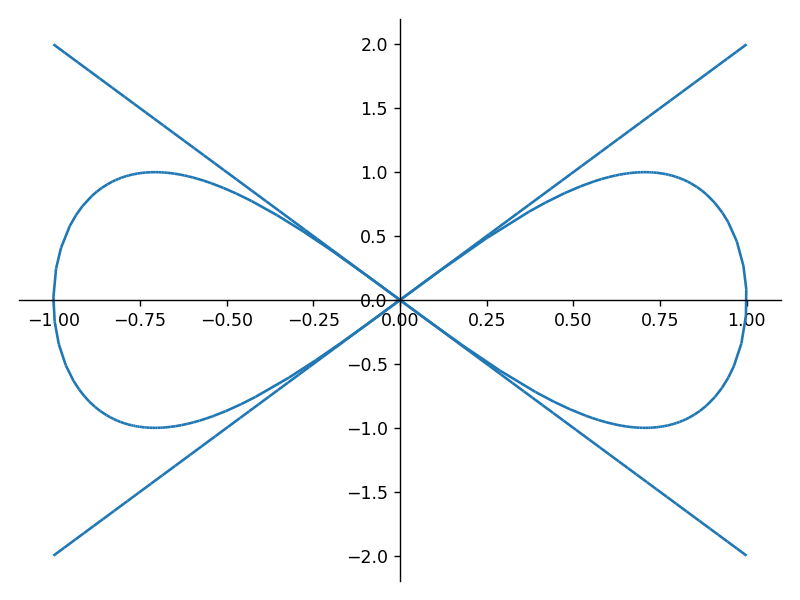

In [13]:
x=symbols('x')
# Step 1 done in part b
# You may be able to tell the answer to step 2 by inspection.  That is fine.  If not...
tsoln=solve([xoft,yoft],t)
print(tsoln) #It should also be obvious that t=0 is a solution.  So our two values are 0 and pi
# Step 3 
m1=dydx.subs(t,0)
eq1=m1*x
m2=dydx.subs(t,pi)
eq2=m2*x
print('The equations of the tangent lines are y=',eq1,'and y=',eq2)
# Step 4 
pcurve=plot_parametric(xoft,yoft,(t,0,2*pi),show=False)
ptangents=plot((eq1,(x,-1,1)),(eq2,(x,-1,1)),show=False) # Experiment to find appropriate domain
pcurve.extend(ptangents)
pcurve.show()

In [14]:
x = symbols('x', positive=True)

f= x**(1/5) * sqrt(x**3+1) / (2-7*x)**4

logf=expand_log(log(f))
display(logf)

0.2*log(x) + log((2 - 7*x)**(-4)) + log(x**3 + 1)/2

In [15]:
ans_a = diff(logf, x) * f
display(ans_a)

x**0.2*sqrt(x**3 + 1)*(3*x**2/(2*(x**3 + 1)) + 28/(2 - 7*x) + 0.2/x)/(2 - 7*x)**4